In [22]:
'''
Project Summary: Deep Learning for Enhanced Trading Signal Generation
Overview
Your project develops a hybrid CNN-LSTM deep learning model to improve trading signal generation for S&P 500 stocks. This approach combines Convolutional Neural Networks (CNNs) for pattern recognition with Long Short-Term Memory (LSTM) networks for temporal analysis to create more reliable and profitable trading signals compared to traditional technical analysis methods.

Data
You're working with an extensive dataset of 501 S&P 500 companies covering from February 2020 to January 2025, containing:

622,641 total observations
76 different features across 7 categories (price indicators, moving averages, volatility metrics, technical indicators, volume indicators, fundamental features, and market features)
Only 1.9% missing values
An average of 1,242.8 data points per company
Exploratory Data Analysis (EDA)
Your EDA phase will involve:

Data Distribution Analysis: Examining the statistical properties of stock prices and returns across the S&P 500 companies
Correlation Analysis: Identifying relationships between various technical indicators and future price movements
Temporal Pattern Visualization: Visualizing time-based patterns in stock price data and technical indicators
Feature Importance Assessment: Determining which of the 76 features are most predictive of price movements
Missing Data Patterns: Analyzing the distribution of the 1.9% missing values to ensure they don't introduce bias
Volatility Analysis: Examining market volatility periods and their impact on technical indicator performance
Market Regime Identification: Identifying different market regimes (bull, bear, sideways) to test model performance across various conditions
Research Question
Your primary research question is: How does a hybrid CNN-LSTM deep learning model improve trading signal reliability and profitability compared to traditional technical analysis?

Hypotheses
Signal Generation Quality: The hybrid CNN-LSTM model will provide significantly better accuracy in signal generation compared to traditional technical analysis.
Trading Performance: CNN-LSTM-based trading strategies will deliver statistically superior risk-adjusted returns (Sharpe ratio, maximum drawdown).
Methodology
Your approach leverages the complementary strengths of two deep learning architectures:

CNN Component: Extracts spatial patterns from price charts and technical indicators
LSTM Component: Analyzes temporal dependencies in the financial time series
The model will be evaluated using metrics including:

Signal accuracy (precision/recall)
Pattern detection timing
False signal rate
Risk-adjusted returns (Sharpe ratio)
Maximum drawdown
Win/loss ratio
Profit factor
Weekly Milestones
Data preprocessing and feature engineering
CNN-LSTM model architecture design and initial implementation
Model training and initial validation
Trading signal generation and evaluation framework
Performance analysis and comparison with traditional methods
Documentation and final report preparation
Significance
This project addresses key limitations of traditional technical analysis, which often suffers from subjectivity and psychological biases. It contributes to algorithmic trading research, which represents 60-70% of daily trading volume in the U.S. equity market (valued at over $7 trillion). The hybrid approach aims to improve both signal accuracy and profitability by capturing both spatial patterns and temporal relationships in financial data.

Expected Outcomes
Development of a CNN-LSTM hybrid model for pattern recognition:
CNN component for spatial feature extraction from price patterns
LSTM component for temporal dependency analysis
Integration of technical indicators as additional features
Trading signal evaluation framework to measure effectiveness:
Comparison of model-generated signals vs. traditional technical analysis
Pattern recognition accuracy assessment
Signal timing precision metrics
Statistical analysis of prediction reliability
This project brings together concepts from deep learning, financial analysis, and algorithmic trading to create a more robust and profitable trading signal generation system.

'''

"\nProject Summary: Deep Learning for Enhanced Trading Signal Generation\nOverview\nYour project develops a hybrid CNN-LSTM deep learning model to improve trading signal generation for S&P 500 stocks. This approach combines Convolutional Neural Networks (CNNs) for pattern recognition with Long Short-Term Memory (LSTM) networks for temporal analysis to create more reliable and profitable trading signals compared to traditional technical analysis methods.\n\nData\nYou're working with an extensive dataset of 501 S&P 500 companies covering from February 2020 to January 2025, containing:\n\n622,641 total observations\n76 different features across 7 categories (price indicators, moving averages, volatility metrics, technical indicators, volume indicators, fundamental features, and market features)\nOnly 1.9% missing values\nAn average of 1,242.8 data points per company\nExploratory Data Analysis (EDA)\nYour EDA phase will involve:\n\nData Distribution Analysis: Examining the statistical prop

# EDA

1. Data Loading and Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from save_results import *

: 

In [ ]:
# Importing the dataset from /stock_data/sp500_master_data.csv
# Load the dataset 
data = pd.read_csv('../stock_data/sp500_master_data.csv')

# Display basic information about the dataset
data.info()
data.describe()
data.columns

In [4]:
# distinct symoble
unique_symbols = data['Symbol'].unique()
#count of distinct symbols
print(len(unique_symbols))

# List of top 20 stock symbols
top_20_symbols = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'AVGO', 'TSLA',
                  'BRK.B', 'GOOG', 'JPM', 'LLY', 'V', 'XOM', 'COST', 'MA', 'UNH',
                  'NFLX', 'WMT', 'PG', 'JNJ', 'HD', 'ABBV', 'BAC', 'CRM']

502


In [8]:
#create count of distinct stock symbols and what date min max they have and min max values of close price as at table for top_20_symbols
# Create a DataFrame to store the summary statistics
summary_stats = pd.DataFrame(columns=['Symbol', 'Start_Date', 'End_Date', 'Min_Close', 'Max_Close'])
# Iterate over the top 20 symbols
for symbol in top_20_symbols:
    symbol_data = data[data['Symbol'] == symbol]
    if not symbol_data.empty:
        start_date = symbol_data['Date'].min()
        end_date = symbol_data['Date'].max()
        min_close = symbol_data['Close'].min()
        max_close = symbol_data['Close'].max()
        #mean daily return
        mean_daily_return = symbol_data['Returns'].mean()
        #Volatility %%!
        volatility = symbol_data['Returns'].std()
        #Sharpe Ratio
        sharpe_ratio = mean_daily_return / volatility
        #Max Drawdown
        max_drawdown = symbol_data['Returns'].min()
        #Profit Factor
        profit_factor = symbol_data['Returns'].sum() / abs(symbol_data['Returns'].min())    
        #Win/Loss Ratio
        win_loss_ratio = symbol_data['Returns'].sum() / abs(symbol_data['Returns'].min())
        #volume
        volume_mean = symbol_data['Volume'].mean()
        # Create a new row as a DataFrame
        new_row = pd.DataFrame({
            'Symbol': [symbol], 
            'Start_Date': [start_date], 
            'End_Date': [end_date],
            'Min_Close': [min_close], 
            'Max_Close': [max_close],
            'Mean_Daily_Return': [mean_daily_return],
            'Volatility': [volatility],
            'Sharpe_Ratio': [sharpe_ratio],
            'Max_Drawdown': [max_drawdown],
            'Profit_Factor': [profit_factor],
            'Win_Loss_Ratio': [win_loss_ratio],
            'Volume_Mean': [volume_mean]
        })
        # Concatenate with the existing DataFrame
        summary_stats = pd.concat([summary_stats, new_row], ignore_index=True)

# Print the summary statistics
print(summary_stats)
save_dataframe(summary_stats, 'summary_stats2.csv')

   Symbol  Start_Date    End_Date   Min_Close    Max_Close  Mean_Daily_Return  \
0    AAPL  2020-03-20  2025-03-18   54.449898   258.735504           0.001240   
1    NVDA  2020-03-20  2025-03-18    5.124869   149.416245           0.003041   
2    MSFT  2020-03-20  2025-03-18  130.157181   464.854340           0.001005   
3    AMZN  2020-03-20  2025-03-18   81.820000   242.059998           0.000833   
4    META  2020-03-20  2025-03-18   88.492943   736.015198           0.001472   
5   GOOGL  2020-03-20  2025-03-18   52.455711   206.142593           0.001077   
6    AVGO  2020-03-20  2025-03-18   16.969955   249.331955           0.002239   
7    TSLA  2020-03-20  2025-03-18   28.502001   479.859985           0.002460   
8    GOOG  2020-03-20  2025-03-18   52.581951   207.473633           0.001082   
9     JPM  2020-03-20  2025-03-18   68.480934   279.950012           0.001104   
10    LLY  2020-03-20  2025-03-18  111.966507   956.783691           0.001758   
11      V  2020-03-20  2025-

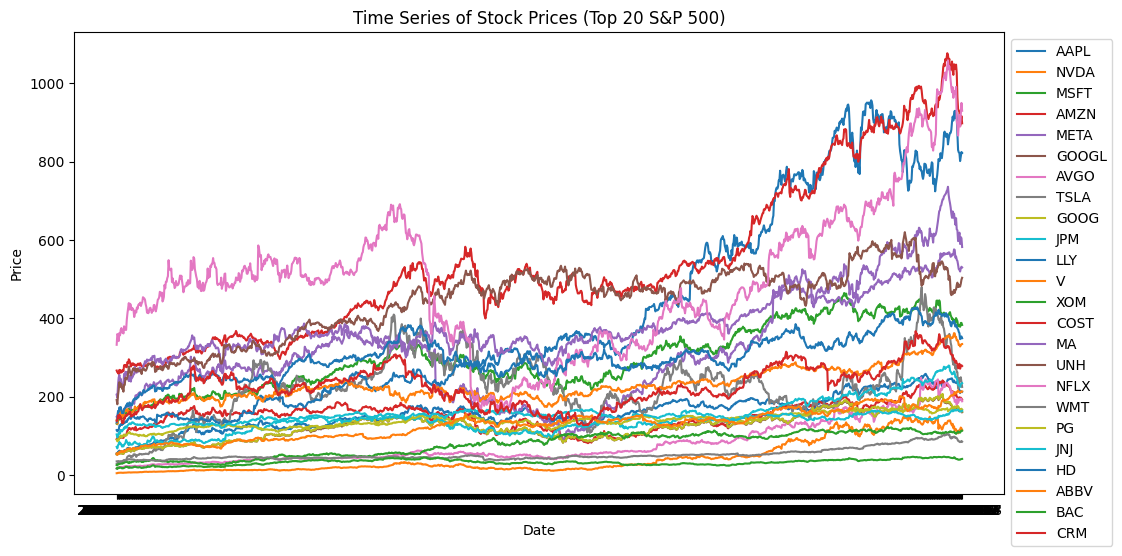

Saved plot to analysis_results\Top20_Stocks_Prices.png


In [10]:
# Plot the closing prices for the top 20 symbols based on the date
# Filter the data to include only the top 20 stocks
filtered_data = data[data['Symbol'].isin(top_20_symbols)]

# Create the time series plot
fig, ax = plt.subplots(figsize=(12, 6))

for symbol in top_20_symbols:
    subset = filtered_data[filtered_data['Symbol'] == symbol]
    if not subset.empty:  # Check if subset is not empty to avoid errors
        plt.plot(subset['Date'], subset['Close'], label=symbol)

plt.title('Time Series of Stock Prices (Top 20 S&P 500)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.show()

save_plot(fig, 'Top20_Stocks_Prices.png')

1. Data Distribution Analysis: Examining the statistical properties of stock prices and returns across the S&P 500 companies

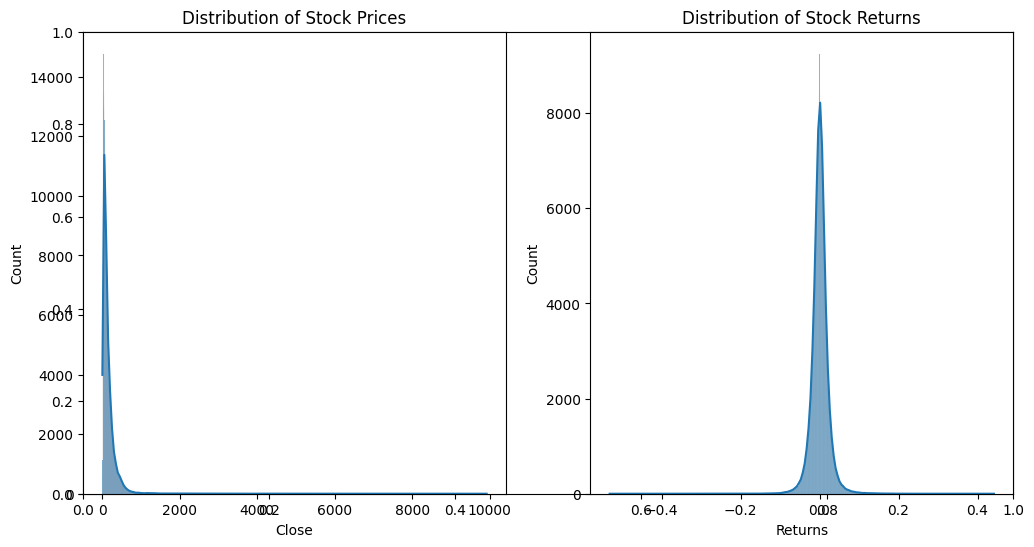

Saved plot to analysis_results\Stock_Prices_Returns_Distribution.png


In [11]:

# Histograms of stock prices and returns

fig, ax = plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Close'], kde=True)  # Replace 'Price' with your price column name
plt.title('Distribution of Stock Prices')
plt.subplot(1, 2, 2)
sns.histplot(data['Returns'], kde=True)  # Replace 'Returns' with your returns column name
plt.title('Distribution of Stock Returns')
plt.show()

#save_plot(fig, 'Stock_Prices_Returns_Distribution.png')

2. Correlation Analysis: Identifying relationships between various technical indicators and future price movements

Saved plot to analysis_results\correlation_matrix.png


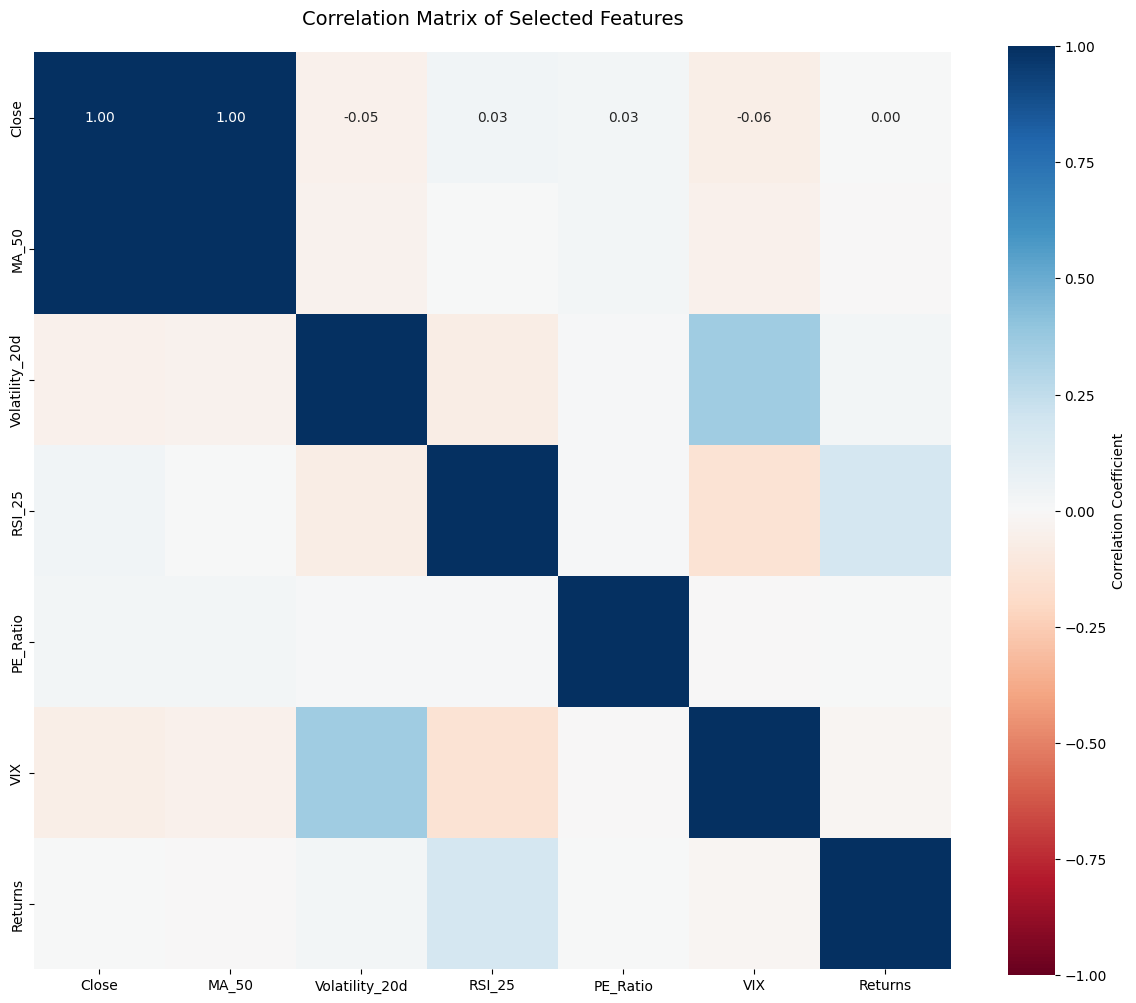

In [15]:
# Create the correlation matrix
correlation_matrix = data[['Close', 'MA_50', 'Volatility_20d', 'RSI_25', 'PE_Ratio', 'VIX', 'Returns']].corr()

# Create figure with larger size
fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap with improved formatting
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='RdBu',  # Red-Blue colormap (red for positive, blue for negative correlations)
            vmin=-1, vmax=1,  # Fix the range of correlations from -1 to 1
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Show 2 decimal places
            square=True,  # Make the plot square-shaped
            cbar_kws={'label': 'Correlation Coefficient'})

# Customize the plot
plt.title('Correlation Matrix of Selected Features', pad=20, size=14)
plt.tight_layout()

# Save the plot
save_plot(fig, 'correlation_matrix.png')

3.Temporal Pattern Visualization: Visualizing time-based patterns in stock price data and technical indicators

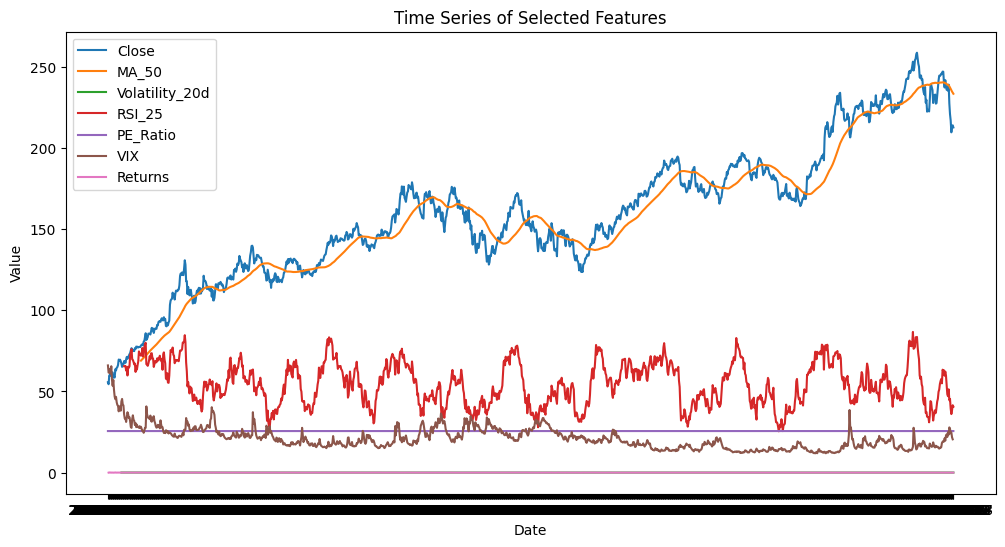

Saved plot to analysis_results\Time_Series_of_Selected_Features.png


In [16]:
# Select one feature from each category for temporal pattern visualization
# Ensure these features are actually in your DataFrame
filtered_data = data[data['Symbol'].isin(['AAPL'])]  # Example: Choose 'AAPL' stock
# Select one feature from each category for temporal pattern visualization
selected_features = {
    'price indicators': 'Close',  # Example: Choose 'Close' price
    'moving averages': 'MA_50', # Example: Choose 50-day SMA - Changed to MA_50
    'volatility metrics': 'Volatility_20d', # Example: Choose the calculated volatility - Changed to Volatility (Capital V)
    'technical indicators': 'RSI_25',  # Example: Choose RSI - Changed to RSI (All Caps)
    #'volume indicators': 'Volume_MA_60d',  # Example: Choose trading volume - Changed to Volume (Capital V)     
    'fundamental features': 'PE_Ratio',  # Example: Choose P/E ratio (if available) - Changed to PE_Ratio (Capital PE and Ratio)
    'market features': 'VIX'  # Example: Choose VIX (if available) - Changed to VIX (All Caps)
    , 'Returns': 'Returns'  # Example: Choose Returns
}

# Create a DataFrame with selected features
selected_data = filtered_data[[feature for feature in selected_features.values()]]
# Plot the time series of selected features
fig, ax = plt.subplots(figsize=(12, 6))
for feature in selected_data.columns:
    plt.plot(filtered_data['Date'], filtered_data[feature], label=feature)
plt.title('Time Series of Selected Features')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
save_plot(fig, 'Time_Series_of_Selected_Features.png')

4. Feature Importance Assessment: Determining which of the 76 features are most predictive of price movements

Mean Squared Error: 0.5623141192631158
Root Mean Squared Error: 0.7498760692695265


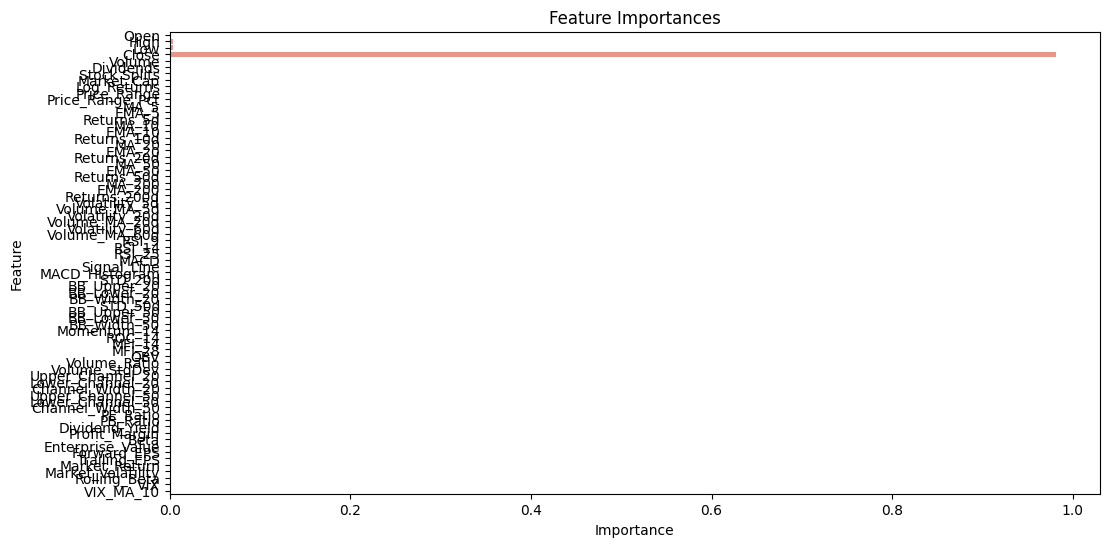

In [9]:
#Feature Importance Assessment: Determining which of the 76 features are most predictive of price movements
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
# drop all object columns
X = data.drop(['Date', 'Symbol', 'Returns'], axis=1)
X = X.select_dtypes(exclude=['object'])
y = data['Close']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [17]:
rf_regressor.feature_importances_

array([7.53588480e-04, 2.94362812e-03, 2.97471552e-03, 9.81018845e-01,
       1.25980879e-07, 1.49900254e-12, 1.44959961e-17, 1.59036061e-09,
       9.92635730e-08, 1.07572973e-07, 1.32287598e-07, 6.87655049e-04,
       4.93988469e-04, 1.15465671e-07, 1.31131875e-03, 9.38218873e-04,
       8.34147343e-08, 1.11612169e-03, 1.56303790e-03, 6.56047856e-08,
       3.46782353e-08, 7.75070236e-07, 1.04977025e-07, 1.01169347e-03,
       9.03020562e-04, 4.99755364e-08, 9.41548239e-08, 1.08202316e-07,
       2.42823409e-07, 1.21287490e-07, 1.52548186e-07, 9.82517079e-08,
       1.28569540e-07, 6.76593561e-08, 1.03229661e-07, 1.42965133e-07,
       2.74671934e-07, 1.54309885e-07, 5.39370645e-08, 9.17517898e-04,
       5.19670125e-08, 1.50497039e-07, 9.96328099e-08, 1.39083062e-03,
       5.96969932e-08, 8.24030683e-08, 8.71343545e-08, 6.08563775e-08,
       7.30773936e-08, 1.50417506e-07, 1.69145120e-06, 1.14275129e-07,
       1.01082061e-07, 1.09442832e-03, 2.61517190e-08, 6.91545876e-08,
      

In [18]:
# pICK THE MOST IMPORTANT feature_importance  > 0
# Filter features with importance greater than 0
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_regressor.feature_importances_})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print top 10 features
print(feature_importances.head(10))


             Feature  Importance
3              Close    0.981019
2                Low    0.002975
1               High    0.002944
18            EMA_20    0.001563
43       BB_Upper_50    0.001391
14             MA_10    0.001311
17             MA_20    0.001116
53  Upper_Channel_20    0.001094
23            MA_200    0.001012
15            EMA_10    0.000938


5.Missing Data Patterns: Analyzing the distribution of the 1.9% missing values to ensure they don't introduce bias

Date            0
Open            0
High            0
Low             0
Close           0
             ... 
VIX           502
VIX_MA_10    5020
SMA_50         49
SMA_200       199
Regime          0
Length: 80, dtype: int64


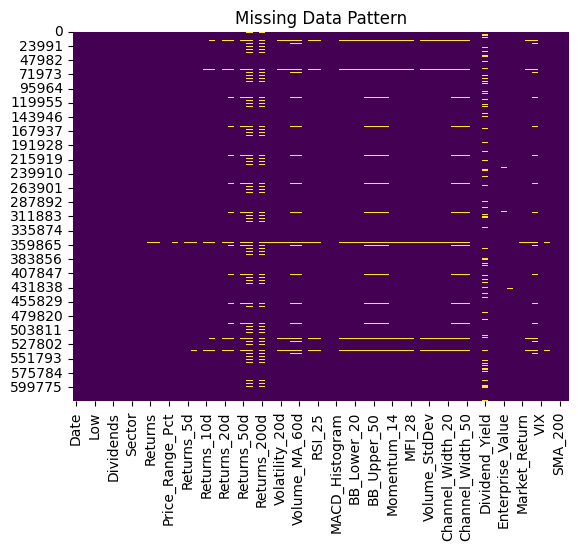

In [19]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

# Visualize missing data patterns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()

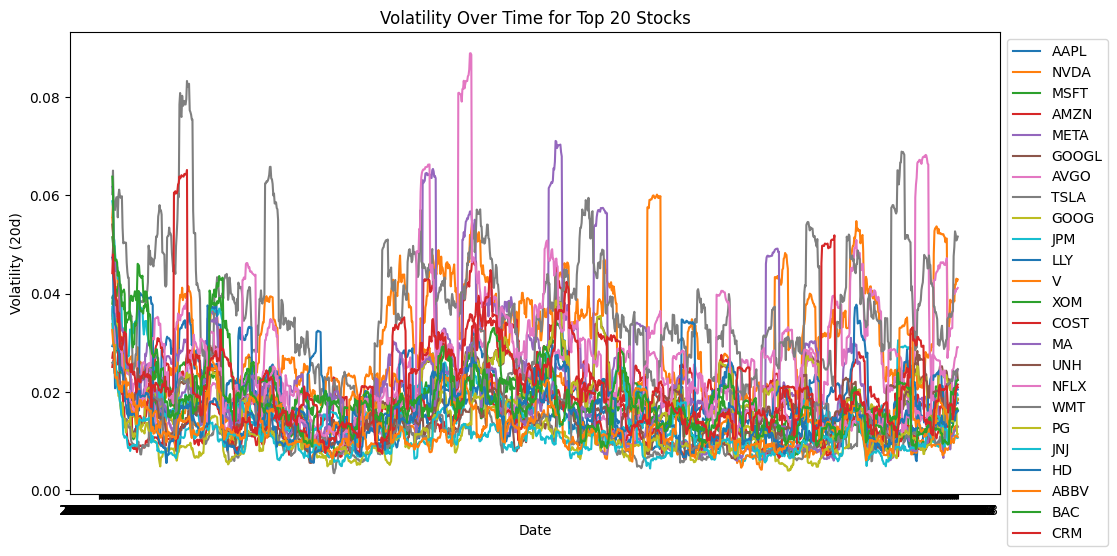

Saved plot to analysis_results\Volatility_Over_Time_for_Top_20_Stocks.png


In [ ]:
# Calculate rolling standard deviation of returns to measure Volatility_20d Column for last 365 days for top 20 stocks

# Plot volatility over time for top 20 stocks
fig, ax = plt.subplots(figsize=(12, 6))
for symbol in top_20_symbols:
    subset = data[data['Symbol'] == symbol]
    if not subset.empty:  # Check if subset is not empty to avoid errors
        plt.plot(subset['Date'], subset['Volatility_20d'], label=symbol)

plt.title('Volatility Over Time for Top 20 Stocks')
plt.xlabel('Date')
plt.ylabel('Volatility (20d)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.show()
save_plot(fig, 'Volatility_Over_Time_for_Top_20_Stocks.png')


6. Market Regime Identification: Identifying different market regimes (bull, bear, sideways) to test model performance across various conditions

In [5]:
# Example using a simple moving average to identify regimes
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Define regime based on SMA crossover
data['Regime'] = 'Sideways'
data.loc[data['SMA_50'] > data['SMA_200'], 'Regime'] = 'Bull'
data.loc[data['SMA_50'] < data['SMA_200'], 'Regime'] = 'Bear'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


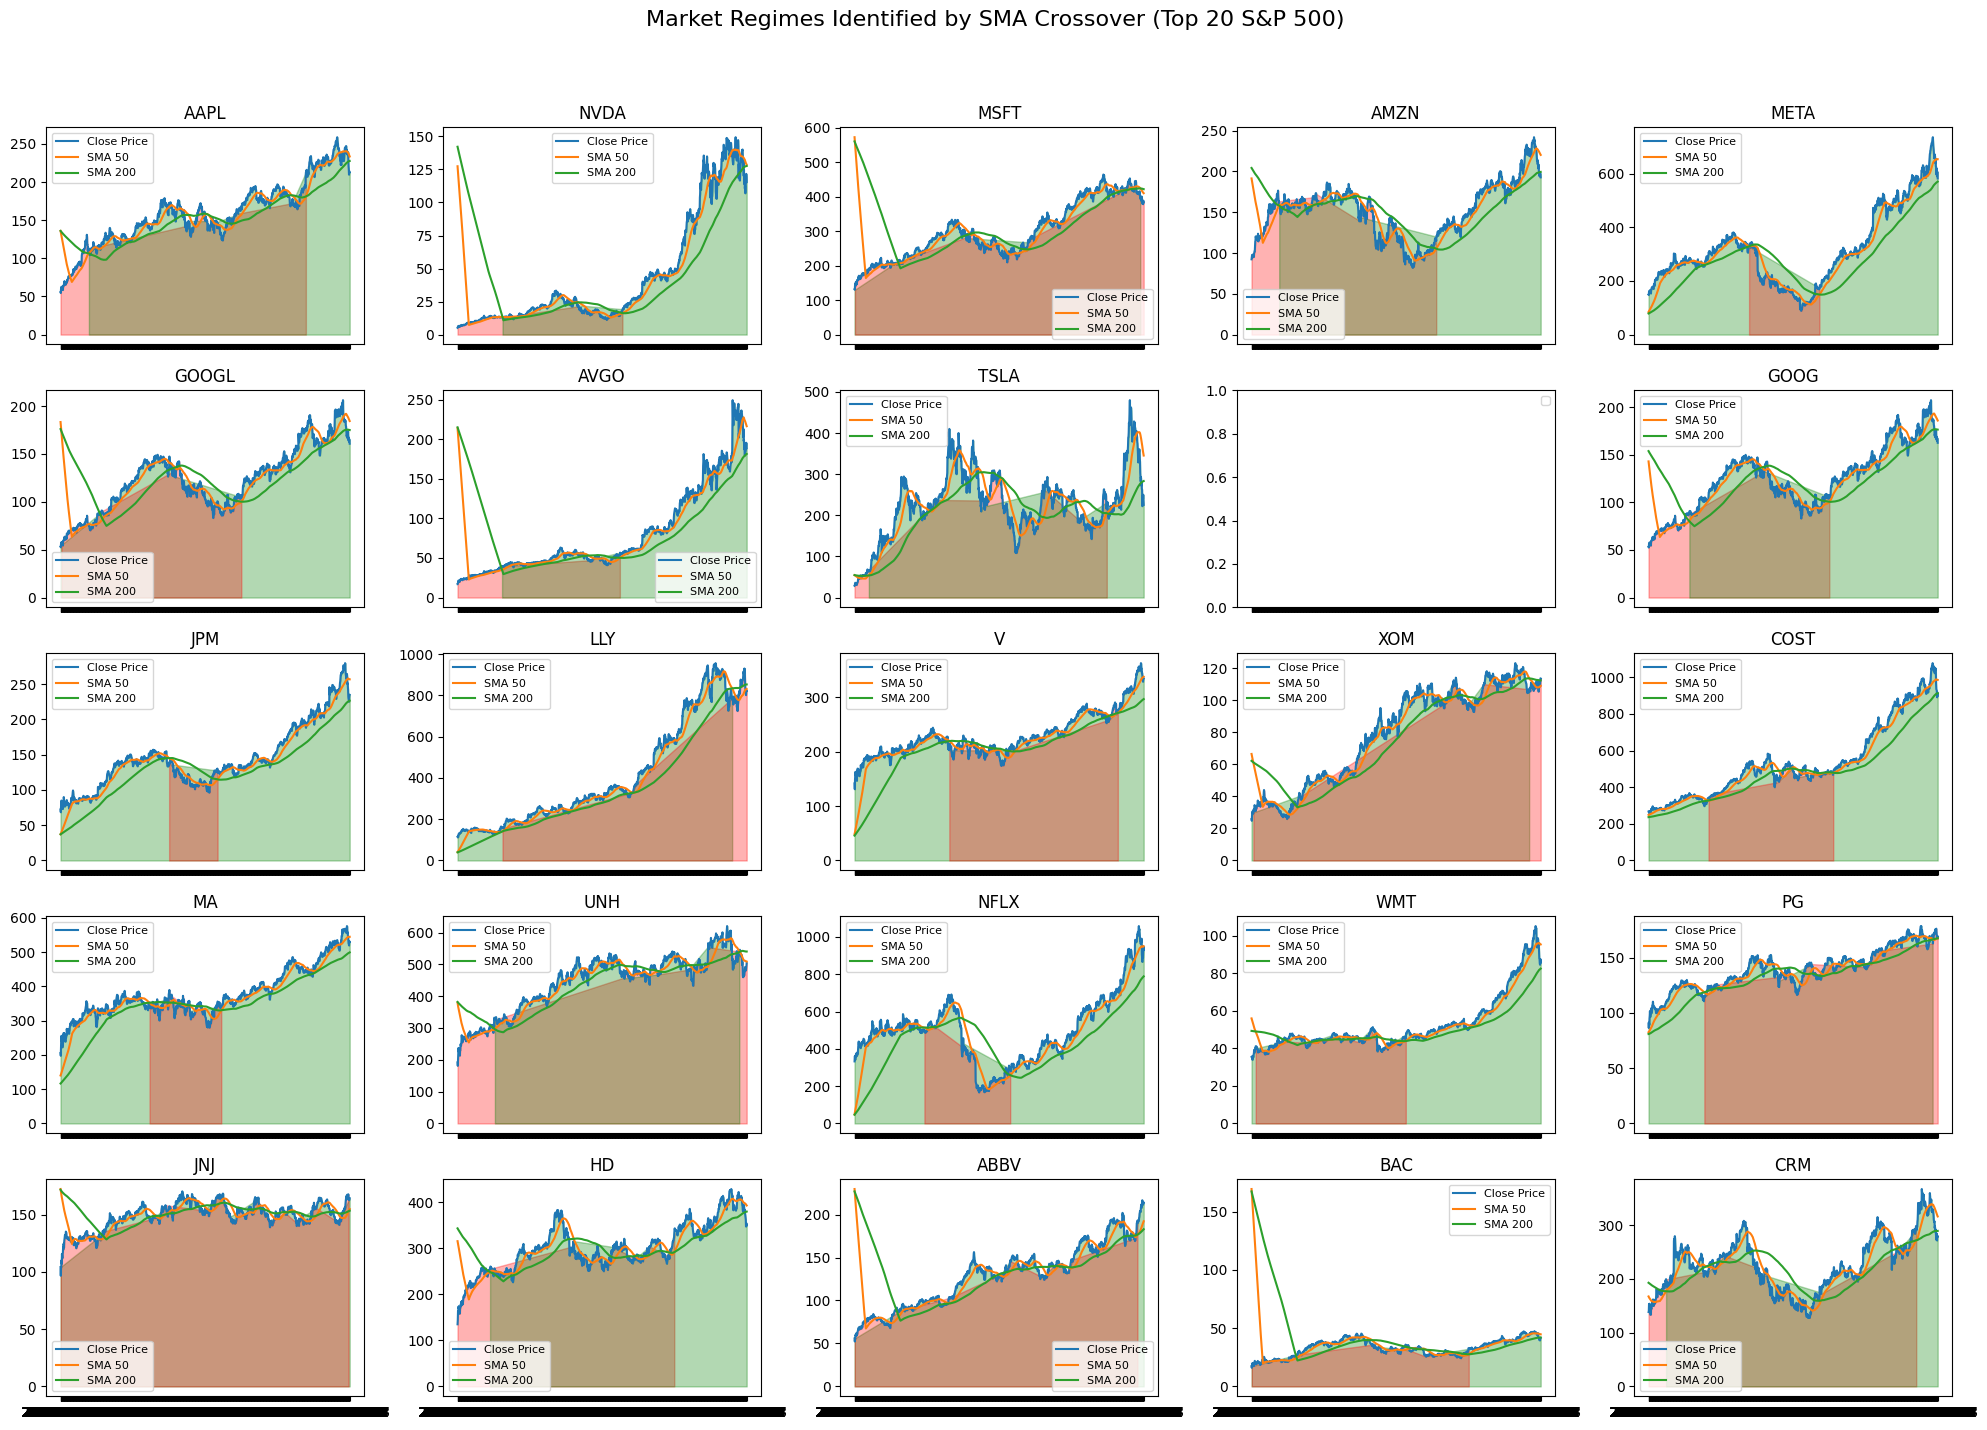

Saved plot to analysis_results\Market_Regimes_Identified_by_SMA_Crossover_Top_20_Stocks.png


In [8]:
# Calculate the frequency of each regime
# Filter the data to include only the top 20 stocks
filtered_data = data[data['Symbol'].isin(top_20_symbols)]

# Define regime colors
regime_colors = {
    'Bull': 'green',
    'Bear': 'red',
    'Sideways': 'gray'
}

# Create a 5x5 grid of subplots to accommodate 25 symbols # Changed from 5x4 to 5x5 to accommodate 25 symbols
fig, axes = plt.subplots(5, 5, figsize=(20, 15), sharex=True)  # sharex aligns x-axis across subplots
fig.suptitle('Market Regimes Identified by SMA Crossover (Top 20 S&P 500)', fontsize=16)

# Iterate through the top 20 stock symbols and plot on each subplot
for i, symbol in enumerate(top_20_symbols):
    row = i // 5  # Calculate row index # Changed divisor from 4 to 5 for correct row calculation
    col = i % 5   # Calculate column index # Changed modulus from 4 to 5 for correct column calculation
    ax = axes[row, col]  # Get the subplot for the current stock

    subset = filtered_data[filtered_data['Symbol'] == symbol]
    if not subset.empty:
        ax.plot(subset['Date'], subset['Close'], label='Close Price')
        ax.plot(subset['Date'], subset['SMA_50'], label='SMA 50')
        ax.plot(subset['Date'], subset['SMA_200'], label='SMA 200')
        ax.set_title(symbol)  # Set title to the stock symbol

        # Highlight different regimes with color
        for regime in subset['Regime'].unique():
            regime_subset = subset[subset['Regime'] == regime]
            ax.fill_between(regime_subset['Date'], regime_subset['Close'],
                            color=regime_colors.get(regime, 'gray'), alpha=0.3)

    ax.legend(fontsize=8)  # Adjust legend fontsize if needed

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlapping
plt.show()
save_plot(fig, 'Market_Regimes_Identified_by_SMA_Crossover_Top_20_Stocks.png')
